<a href="https://colab.research.google.com/github/NaydelinAidee/Simulaci-nI/blob/main/Rachas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RACHAS
Naydelin Aidee Carcamo hernandez

**La prueba de rachas** o que verifica si el orden en que aparecen  dos valores de una variable es aleatorio. Se basa en el número de rachas que presenta una muestra.


Una  **racha** es una secuencia de observaciones similares.
Por ejemplo, una racha puede ser una secuencia de valores consecutivos .



**¿Cómo se realiza la prueba de rachas? **


1.-Determine la secuencia de unos y ceros donde genera un 1 si x_i < x_i-1 y un cero si x_i > x_i-1

2.-Hallar el numero de rachas observadas(vas contabilizando)

3.- Se calcula el valor esperado  y la varianza asi como z_0,asi como en la imagen
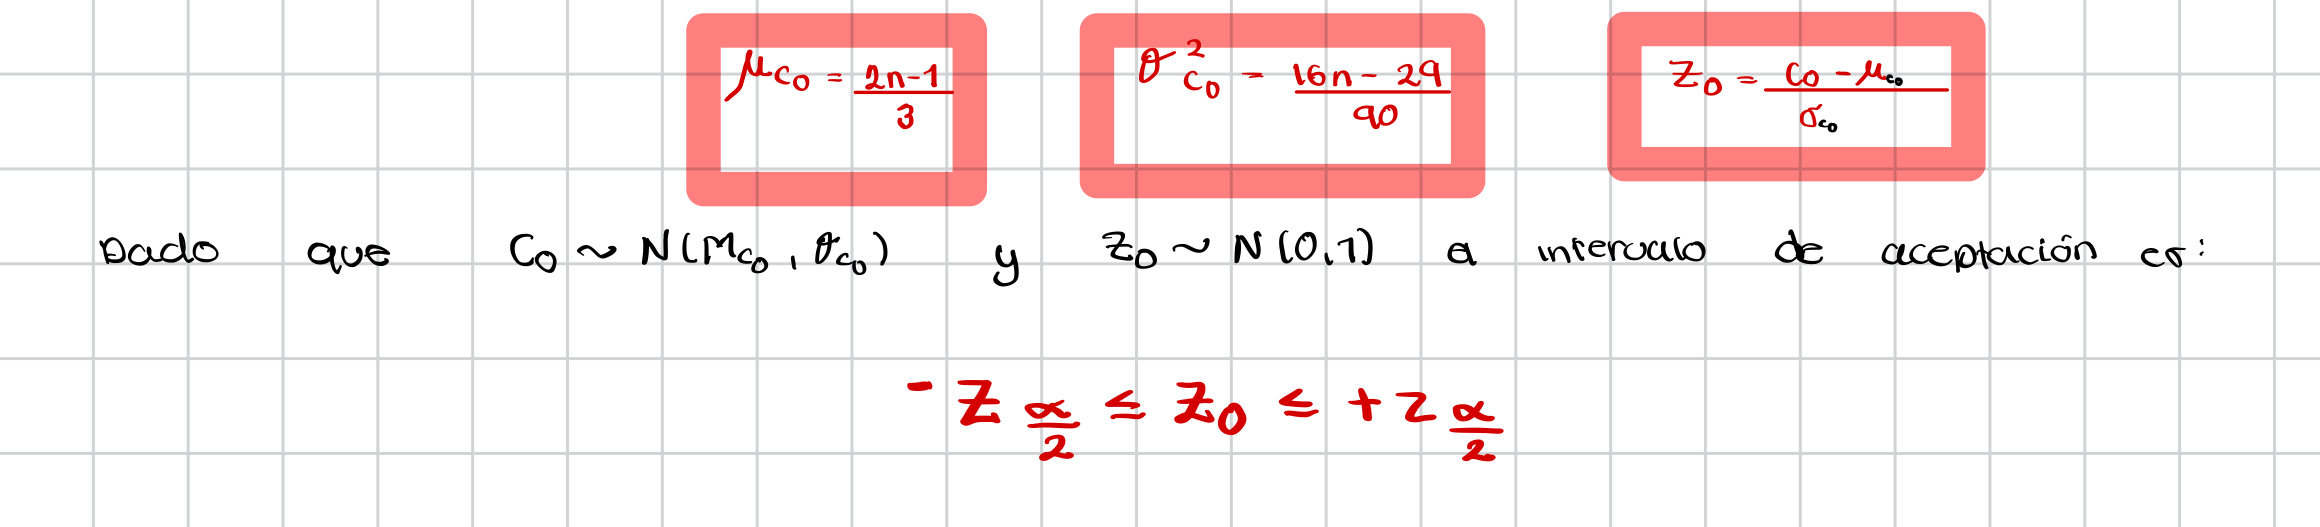

4.- verr si esta en el intervalo de aceptacion anterior


**¿Para qué se utiliza la prueba de rachas?**
En modelización estocástica, y algunas ciencia de la computación, es deseable que algunos datos de entrada sean aleatorios.

Descripción: Esta función recibe  datos (prueba1) y genera una secuencia binaria de ceros y unos dependiendo de si el valor de un elemento es mayor que el valor del anterior en la racha.
*   Elemento de lista
Si el valor en prueba1[i] es mayor que el valor anterior (prueba1[i - 1]), se asigna un 1 en la racha binaria.
*   Elemento de lista
Si el valor es menor o igual, se asigna un 0 en la racha

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos
prueba1 = np.array([
    0.347, 0.993, 0.674, 0.426, 0.46, 0.189, 0.112, 0.37, 0.909, 0.178,
    0.832, 0.371, 0.628, 0.054, 0.224, 0.753, 0.191, 0.314, 0.764, 0.516,
    0.966, 0.729, 0.055, 0.022, 0.99, 0.73, 0.584, 0.731, 0.999, 0.437,
    0.472, 0.067, 0.494, 0.742, 0.786, 0.797, 0.347, 0.742, 0.303, 0.393,
    0.797, 0.189, 0.494, 0.674, 0.393, 0.292, 0.426, 0.213, 0.718, 0.268,
    0.101, 0.977, 0.235, 0.898, 0.461, 0.876, 0.057, 0.472, 0.933, 0.123,
    0.696, 0.843, 0.178, 0.641, 0.011, 0.707, 0.819, 0.641, 0.056, 0.945,
    0.966, 0.562, 0.775, 0.674, 0.977, 0.562, 0.303, 0.944, 0.415, 0.527,
    0.404, 0.549, 0.797, 0.821, 0.246, 0.562, 0.404, 0.28, 0.819, 0.459,
    0.603, 0.992, 0.252, 0.19, 0.881, 0.821, 0.64, 0.663, 0.444, 0.652
])

# Función para generar la secuencia de 0 y 1
def generar_racha(prueba1):
    racha = np.zeros(len(prueba1) - 1, dtype=int)  # Se  hacen n-1 comparar con el anterior
    for i in range(1, len(prueba1)):  # Corrección en el índice
        if prueba1[i] > prueba1[i - 1]:
            racha[i - 1] = 1  # Asignamos 1 si hay un incremento
        else:
            racha[i - 1] = 0  # Asignamos 0 si hay una disminución
    return racha

 Esta función cuenta el número de "rachas" en la secuencia binaria generada por la función anterior. Una racha es una serie de valores que se repiten.

Cuando se detecta un cambio en el valor de la secuencia (de 0 a 1 o de 1 a 0) el contador va aumentando o sumando una racha.

In [ ]:

# Generar la secuencia binaria
racha_binaria = generar_racha(prueba1)  # Cambié 'data' por 'prueba1'
print("Secuencia binaria generada:", racha_binaria)

# Contar el número de corridas
def contar_rachas(secuencia):
    corridas = 1  # La primera racha siempre comienza en 1
    for i in range(1, len(secuencia)):  # Recorremos la secuencia
        if secuencia[i] != secuencia[i - 1]:  # Si cambia de 0 a 1 o viceversa, es una nueva racha
            corridas += 1
    return corridas

Primero calculamos el numero de corridad y posteriormente usamos las formulas vistas en clase para hallar valor esperado,varianza, y desviacion estandar

In [ ]:
# Calcular el número de corridas
num_rachas = contar_rachas(racha_binaria)

# Calcular el valor esperado y la varianza de las corridas
valor_esperado = ((2 * len(prueba1) - 1) / 3)
varianza = (16 * len(prueba1) - 29) / 90
desviacion_estandar = np.sqrt(varianza)

# Calcular el estadístico Z
Z = (num_rachas - valor_esperado) / desviacion_estandar

# Nivel de significancia
alpha = 0.05

# Valor crítico
z_critico = norm.ppf(1 - alpha / 2)
intervalo_critico = [-z_critico, z_critico]


Imprimimos nuestros resultados.

In [ ]:
# Resultados
print("Número de corridas:", num_rachas)
print("Valor esperado de corridas:", valor_esperado)
print("Desviación estándar:", desviacion_estandar)
print("Estadístico Z:", Z)
print(f"Intervalo crítico:  {intervalo_critico}")

Aqui esta el codigo completo que se encarga de automatizar estas rachas.

In [14]:
import numpy as np
from scipy.stats import norm

# Datos
prueba1 = np.array([
    0.347, 0.993, 0.674, 0.426, 0.46, 0.189, 0.112, 0.37, 0.909, 0.178,
    0.832, 0.371, 0.628, 0.054, 0.224, 0.753, 0.191, 0.314, 0.764, 0.516,
    0.966, 0.729, 0.055, 0.022, 0.99, 0.73, 0.584, 0.731, 0.999, 0.437,
    0.472, 0.067, 0.494, 0.742, 0.786, 0.797, 0.347, 0.742, 0.303, 0.393,
    0.797, 0.189, 0.494, 0.674, 0.393, 0.292, 0.426, 0.213, 0.718, 0.268,
    0.101, 0.977, 0.235, 0.898, 0.461, 0.876, 0.057, 0.472, 0.933, 0.123,
    0.696, 0.843, 0.178, 0.641, 0.011, 0.707, 0.819, 0.641, 0.056, 0.945,
    0.966, 0.562, 0.775, 0.674, 0.977, 0.562, 0.303, 0.944, 0.415, 0.527,
    0.404, 0.549, 0.797, 0.821, 0.246, 0.562, 0.404, 0.28, 0.819, 0.459,
    0.603, 0.992, 0.252, 0.19, 0.881, 0.821, 0.64, 0.663, 0.444, 0.652
])

# Función para generar la secuencia de 0 y 1
def generar_racha(prueba1):
    racha = np.zeros(len(prueba1) - 1, dtype=int)  # Se  hacen n-1 comparar con el anterior
    for i in range(1, len(prueba1)):  # Corrección en el índice
        if prueba1[i] > prueba1[i - 1]:
            racha[i - 1] = 1  # Asignamos 1 si hay un incremento
        else:
            racha[i - 1] = 0  # Asignamos 0 si hay una disminución
    return racha

# Generar la secuencia binaria
racha_binaria = generar_racha(prueba1)  # Cambié 'data' por 'prueba1'
print("Secuencia binaria generada:", racha_binaria)

# Contar el número de corridas
def contar_rachas(secuencia):
    corridas = 1  # La primera racha siempre comienza en 1
    for i in range(1, len(secuencia)):  # Recorremos la secuencia
        if secuencia[i] != secuencia[i - 1]:  # Si cambia de 0 a 1 o viceversa, es una nueva racha
            corridas += 1
    return corridas

# Calcular el número de corridas
num_rachas = contar_rachas(racha_binaria)

# Calcular el valor esperado y la varianza de las corridas
valor_esperado = ((2 * len(prueba1) - 1) / 3)
varianza = (16 * len(prueba1) - 29) / 90
desviacion_estandar = np.sqrt(varianza)

# Calcular el estadístico Z
Z = (num_rachas - valor_esperado) / desviacion_estandar

# Nivel de significancia
alpha = 0.05
#intervalo critico
intervalo_critico = -norm.ppf(alpha / 2), norm.ppf(1 - alpha / 2)

# Resultados
print("Número de corridas:", num_rachas)
print("Valor esperado de corridas:", valor_esperado)
print("Desviación estándar:", desviacion_estandar)
print("Estadístico Z:", Z)
print(f"Intervalo crítico:  {intervalo_critico}")

Secuencia binaria generada: [1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1]
Número de corridas: 71
Valor esperado de corridas: 66.33333333333333
Desviación estándar: 4.1779846284489315
Estadístico Z: 1.116965973232688
Intervalo crítico:  (np.float64(1.9599639845400545), np.float64(1.959963984540054))
